# 0. Imports

## 0.a. Import des librairies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as st
from sklearn.preprocessing import scale

In [ ]:
import tensorflow as tf

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials

## 0.b. Import des données

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


# I. Data management

In [ ]:
## 1. Faites une brève description de la base de données (nombre de lignes, de colonnes, % de churn)
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,6338.000000,6338.000000,6338.000000
mean,0.160461,32.435942,64.773391
std,0.367062,24.504535,30.099748
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.550000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [ ]:
#TotalCharges à convertir en float
#Nous considérerons qu'une tenure de 0 signifie que le client est resté moins d'un mois abonné. Nous le gardons dans notre dataset pour l'exploitation.

In [ ]:
df.Churn.value_counts()/df.shape[0]
# Il y a 26% de la clientèle qui résilie leur abonnement/contrat.

No     0.737141
Yes    0.262859
Name: Churn, dtype: float64

In [ ]:
## 2. Détectez et traitez les valeurs manquantes ou aberrantes (s’il y en a)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# II. Exploration des données

## Suppression des variables non essentielles



In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Suppression des variables customerID, tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

In [ ]:
df = df.drop(axis=0, columns=["customerID", "tenure", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"])

In [ ]:
df.shape

(6338, 14)

## Graphiques



In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Churn'],
      dtype='object')

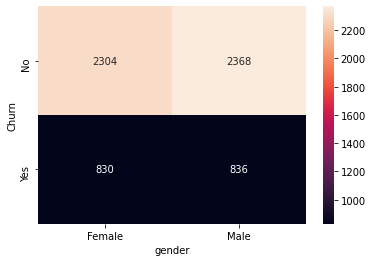

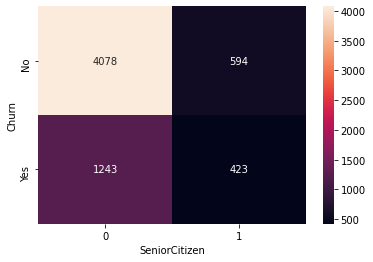

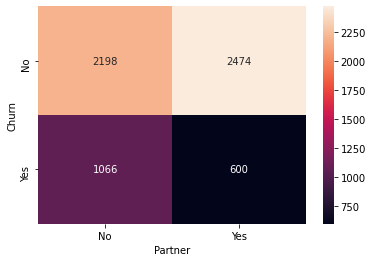

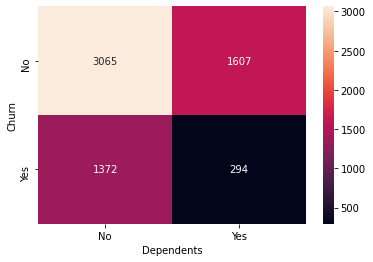

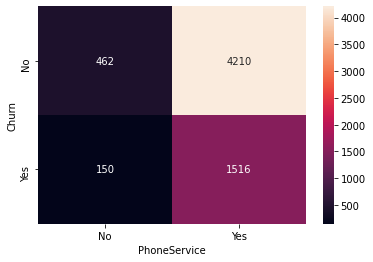

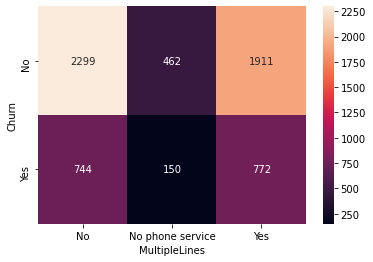

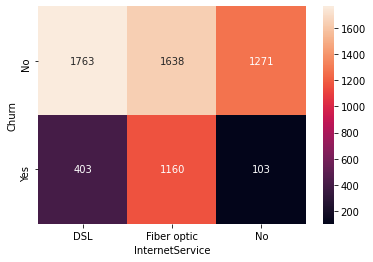

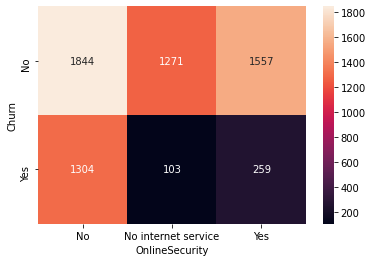

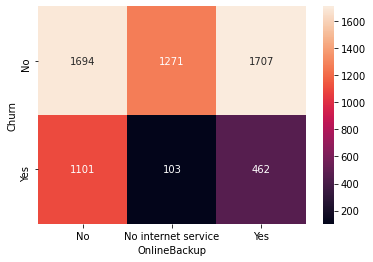

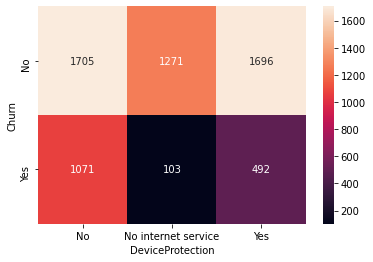

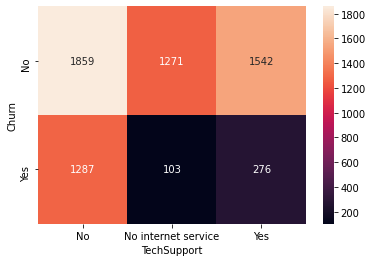

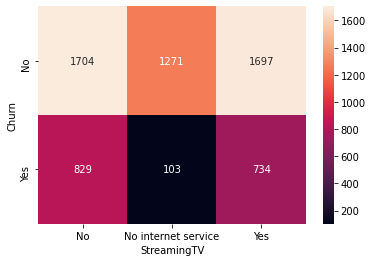

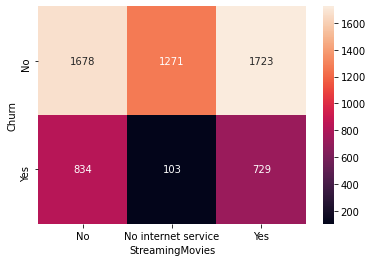

In [ ]:
colonnes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',\
            'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',\
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in colonnes:
    plt.figure()
    sb.heatmap(pd.crosstab(df['Churn'], df[col]), annot=True, fmt = 'd')

**Observations:**

*   Même proportion d'hommes et de femmes pour le churn Yes et No.
*   Il y a plus de clients de moins de 65 ans qui résilient.
*   Il y a plus de clients célibataires qui résilient.
*   Les clients ayant des personnes à charge résilient le plus.
*   La proportion de clients qui résilient et possèdant un abonnement téléphonique n'est pas très différente de celle des clients sans abonnement téléphonique. De même pour les clients ayant souscrits à plusieurs lignes.
*   Il y a plus de clients possèdant la fibre optique qui résilient.
*   Il y a plus de clients ne possèdant pas d'une sécurité en ligne qui résilient.
*   Il y a plus de clients ne possèdant pas une sauvegarde en ligne qui résilient.
*   Il y a plus de clients ne possèdant pas un abonnement de protection qui résilient.
*  Il y a plus de clients n'ayant pas souscrits à un programme d'assistance technique qui résilient.
*   La proportion de clients qui résilient et regardant des programmes de télévision ou d'un fournisseurs tiers en streaming n'est pas très différente de celle des clients n'en regardant pas.


**Interprétations :**

*   Les variables suivantes ne semblent pas influer sur le taux de churn : gender, PhoneService, MultipleLine, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovie
*   Les variables suivantes semblent influer le taux de churn : SeniorCitizen, Partner, Dependents, InternetService


**Hypothèses :**

*   Les étudiants peuvent représenter une grande partie des clients qui résilient : < 65 ans, souvent vivant seuls donc célibataires et sans charges. 
*   Il y a peut être des problèmes techniques avec la fibre optique.







# III. Modélisation

 1. Construction de la base de modélisation (conversion de variables catégorielles en numérique, découpage de variables, transformation de variables, ....)
 2. Scindez la base de modélisation en échantillon d’apprentissage (70%) et de test (30%)

## Base de modélisation

In [ ]:
df.OnlineSecurity.unique()
#df.OnlineBackup.unique()
#df.DeviceProtection.unique()
#df.TechSupport.unique()
#df.StreamingTV.unique()
#df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
# Traitement des valeurs catégorielles

def encodage(df):
    
    code  = {'Yes':0, 'No':1,'No internet service':2,
             'Month-to-month':1,'Two year':2, 'One year':3,
             'Fiber optic':2,'DSL':3,
             'Male':0, 'Female':1,'No phone service':2,
             'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3,'Credit card (automatic)':4,
             }
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].map(code)  
        
    return df

In [ ]:
df = encodage(df)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,1,0,0,1,1,2,3,1,0,1,1,1,1,1
1,0,0,1,1,0,1,3,0,1,0,1,1,1,1
2,0,0,1,1,0,1,3,0,0,1,1,1,1,0
3,0,0,1,1,1,2,3,0,1,0,0,1,1,1
4,1,0,1,1,0,0,2,1,1,0,1,0,0,0


## Division du dataset : train et test sets

In [ ]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size = 0.3, random_state = 0)

In [ ]:
X_train = trainset.drop(axis=0, columns="Churn")
X_test = testset.drop(axis=0, columns="Churn")
y_train = trainset["Churn"]
y_test = testset["Churn"]

3. Implémentez les modèles de machine learning suivants et optimisez-les avec une des méthodes d’optimisation vu en cours.\
a. Random forest\
b. XGBoost\
c. ANN (en optimisant le pas de descente de gradient)


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

Optimisation du modèle random forest par grid search

In [ ]:
def print_score(predict, y_test):
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, predict)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, predict)))   
        print("AUC : \n {}\n".format(roc_auc_score(y_test, predict)))  

In [ ]:
X_train.shape

In [ ]:
n_estimators = [100, 150, 200]
max_features = [3, 5, 7]
max_depth = [2, 3, 4]
min_samples_split = [6, 8, 10]
min_samples_leaf = [2, 3, 5]
bootstrap = [True, False]

rf_param_grid = {"max_depth": max_depth,
              "max_features": max_features,
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf,
              "bootstrap": bootstrap,
              "n_estimators" :n_estimators,
              "criterion": ["gini"]}

RF = RandomForestClassifier()

## Implémentation de la fonction GridSearch
GS_rf = GridSearchCV(RF, param_grid=rf_param_grid, scoring = 'accuracy', cv = 3, return_train_score=True, verbose=1, n_jobs=-1)
GS_rf.fit(X_train, y_train)

#### Affichage des paramètres optimaux et du score correspondant
print("Best parameters {}".format(GS_rf.best_params_))
print("Best score {:.4f}".format(GS_rf.best_score_))

### Prédiction de la probabilité de churn sur l'échantillon de test
pred_RF = GS_rf.best_estimator_.predict(X_test)
print_score(pred_RF, y_test)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1458 out of 1458 | elapsed:  7.3min finished


Best parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Best score 0.7743
Test Result:

accuracy score: 0.7634

Confusion Matrix: 
 [[ 188  323]
 [ 127 1264]]

AUC : 
 0.63830242219693



## XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
n_estimators = [100, 200, 300, 400]
max_depth = [2, 3, 4]
learning_rates = [0.5, 0.7, 0.9]
reg_alpha = [0.10, 0.15]
reg_lambda = [0.1, 0.2]
gamma = [0.1, 0.2]

xgb_param_grid = {"max_depth": max_depth,
              "learning_rate": learning_rates,
              "reg_alpha": reg_alpha,
              "reg_lambda": reg_lambda,
              "gamma": gamma,
              "n_estimators" :n_estimators}


xgb_clf = xgb.XGBClassifier()

GS_xgb = GridSearchCV(xgb_clf, param_grid=xgb_param_grid, scoring = 'accuracy', cv = 3, return_train_score=True, verbose=1, n_jobs=-1)
GS_xgb.fit(X_train, y_train)

print("Best parameters {}".format(GS_xgb.best_params_))
print("Best score {:.4f}".format(GS_xgb.best_score_))

pred_xgb = GS_xgb.best_estimator_.predict(X_test)
print_score(pred_xgb, y_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.2min


Best parameters {'gamma': 0.2, 'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0.15, 'reg_lambda': 0.2}
Best score 0.7712
Test Result:

accuracy score: 0.7524

Confusion Matrix: 
 [[ 206  305]
 [ 166 1225]]

AUC : 
 0.6418962550699845



[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.6min finished


## ANN

### Import de librairies

In [ ]:
!pip install -q seaborn
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

### Modélisation

In [ ]:
trainset.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
4615,0,0,0,1,0,0,2,0,0,0,0,0,1,1
5012,0,0,0,0,0,1,1,2,2,2,2,2,2,1
5645,0,0,0,0,0,1,3,1,0,1,0,0,0,1
5304,0,0,0,1,0,1,3,0,0,1,0,1,1,1
5424,1,0,0,0,0,1,2,1,0,1,1,1,0,0


In [ ]:
train_stats = trainset.describe()
train_stats.pop('Churn')

count    4436.000000
mean        0.739630
std         0.438886
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [ ]:
train_stats = train_stats.transpose()

In [ ]:
train_labels = trainset.pop('Churn') #y_train
test_labels = testset.pop('Churn')  #y_test

In [ ]:
#Normalisation. On ramène tous sur une échelle de 0 à 1
def norm(x):
  return (x - train_stats['mean'])/train_stats['std']

normed_train_data = norm(trainset)
normed_test_data = norm(testset)


# Standardisation. On peut ramener nos valeurs sur une échelle positive
def stand(x):
  return (x*1.0/train_stats['max'])

stand_train_data = stand(trainset)
stand_test_data = stand(testset)


In [ ]:
stand_train_data
stand_test_data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
6135,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,0.5,0.5,0.5,0.5,0.5,0.5
733,0.0,1.0,1.0,1.0,0.0,0.5,0.333333,1.0,1.0,1.0,1.0,1.0,1.0
3352,1.0,0.0,1.0,1.0,0.0,0.5,1.000000,0.0,0.5,0.0,0.5,0.5,0.5
3312,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.5,0.0,0.0,0.0
6076,1.0,0.0,1.0,1.0,0.0,0.0,0.666667,0.5,0.5,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,0.0,0.0,1.0,0.0,0.0,0.5,0.333333,1.0,1.0,1.0,1.0,1.0,1.0
2579,0.0,0.0,1.0,1.0,0.0,0.5,0.666667,0.5,0.5,0.5,0.5,0.5,0.0
5271,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.5,0.5,0.5,0.5,0.0,0.0
1082,1.0,0.0,1.0,1.0,0.0,0.5,1.000000,0.5,0.5,0.0,0.0,0.0,0.0


In [ ]:
def build_model():
  model = keras.Sequential([
                            layers.Dense(64, activation='linear', input_shape=[len(trainset.keys())]),
                            layers.Dense(32, activation='relu'),
                            layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  #fontion/ mecanisme utilisé pour optimiser la descente de gradient

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 500

history = model.fit(
    stand_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()]
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Epoch: 0, loss:0.1929,  mean_absolute_error:0.3677,  mean_squared_error:0.1929,  val_loss:0.1557,  val_mean_absolute_error:0.2965,  val_mean_squared_error:0.1557,  
....................................................................................................
Epoch: 100, loss:0.1395,  mean_absolute_error:0.2868,  mean_squared_error:0.1395,  val_loss:0.1591,  val_mean_absolute_error:0.3105,  val_mean_squared_error:0.1591,  
....................................................................................................
Epoch: 200, loss:0.1345,  mean_absolute_error:0.2802,  mean_squared_error:0.1345,  val_loss:0.1657,  val_mean_absolute_error:0.3062,  val_mean_squared_error:0.1657,  
....................................................................................................
Epoch: 300, loss:0.1318,  mean_absolute_error:0.2764,  mean_squared_error:0.1318,  val_loss:0.1736,  val_mean_absolute_error:0.3173,  val_mean_squared_error:0.1736,  
..............................

# Choix du meilleur modèle : Random Forest

Nous choisissons d'implémenter le random forest pour l'évaluation.

In [ ]:
df_eval = pd.read_csv("evaluation.csv")

In [ ]:
df_eval.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0811-GSDTP,Female,0,No,Yes,13,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.20
1,1970-KKFWL,Female,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.10
2,2892-GESUL,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25
3,2842-BCQGE,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40
4,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75


### Suppression des variables non essentielles



In [ ]:
df_eval.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Suppression des variables customerID, tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

In [ ]:
df_eval = df_eval.drop(axis=0, columns=["customerID", "tenure", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"])

### Base de modélisation

In [ ]:
# Traitement des valeurs catégorielles

def encodage(df_eval):
    
    code  = {'Yes':0, 'No':1,'No internet service':2,
             'Month-to-month':1,'Two year':2, 'One year':3,
             'Fiber optic':2,'DSL':3,
             'Male':0, 'Female':1,'No phone service':2,
             'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3,'Credit card (automatic)':4,
             }
    for col in df_eval.select_dtypes('object').columns:
        df_eval[col] = df_eval[col].map(code)  
        
    return df_eval

In [ ]:
df_eval = encodage(df_eval)

In [ ]:
df_eval.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,1,0,1,2,3,1,0,1,1,1,1
1,1,0,1,1,0,0,1,2,2,2,2,2,2
2,1,0,0,0,0,1,1,2,2,2,2,2,2
3,0,0,1,1,0,0,2,1,1,1,1,1,1
4,1,0,1,1,0,1,1,2,2,2,2,2,2


### Random forest

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Rappel No:1 et Yes:0
prediction = RF.predict(df_eval)
tx_churn = 1 - (prediction.sum()/len(prediction))
tx_churn

0.21276595744680848

In [ ]:
prediction

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

D'après la prédiction du modèle Random Forest, il y aura un taux de churn de 21,27%.

In [ ]:
pred = pd.DataFrame(prediction)
pred.to_csv("evaluation_MIRALI_ABIDI")

In [ ]:
pred

,0
0,1
1,1
2,1
3,0
4,1
...,...
700,1
701,1
702,1
703,0
